In [1]:
import os, inspect
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) # script directory
print(main_dir)
%load_ext autoreload
%autoreload 2
from RGCPD import RGCPD
from RGCPD import BivariateMI

/Users/semvijverberg/surfdrive/Scripts/RGCPD


/Users/semvijverberg/miniconda3/envs/RGCPD3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Could not import rpy package
Could not import r-package RCIT


In [2]:
# define input: list_of_name_path = [('TVname', 'TVpath'), ('prec_name', 'prec_path')]
path_test = os.path.join(main_dir, 'data')
list_of_name_path = [(3, os.path.join(path_test, 'tf5_nc5_dendo_80d77.nc')),
                    ('sst', os.path.join(path_test,'sst_1979-2018_2.5deg_Pacific.nc'))]

# define analysis:
list_for_MI = [BivariateMI(name='sst', func=BivariateMI.corr_map, 
                          kwrgs_func={'alpha':.0001, 'FDR_control':True}, 
                          distance_eps=700, min_area_in_degrees2=5)]

rg = RGCPD(list_of_name_path=list_of_name_path,
           list_for_MI=list_for_MI,
           path_outmain=os.path.join(main_dir,'data'))

Plotting Corr maps xrclustered, split 0, lag 0

./RGCPD/plot_maps.py:254: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(pad=1.1-0.02*rows.size, h_pad=None, w_pad=None, rect=None)


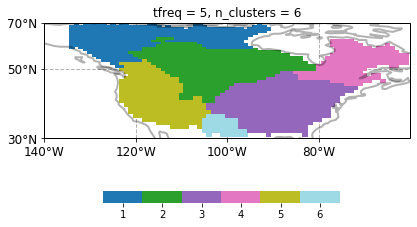

In [3]:
# if TVpath contains the xr.DataArray xrclustered, we can have a look at the spatial regions.
rg.plot_df_clust()

In [4]:
rg.pp_precursors(detrend=True, anomaly=True, selbox=None)

Loaded post-processed data of sst



### Post-processing Target Variable

In [5]:
rg.pp_TV()

original tfreq of imported response variable is converted to desired tfreq


In [6]:
rg.traintest?

Signature: rg.traintest(method: str = None, seed=1, kwrgs_events=None)
Docstring:
Splits the training and test dates, either via cross-validation or
via a simple single split.
agrs:
'method'        : str referring to method to split train test, see
                  options for method below.
seed            : the seed to draw random samples for train test split
kwrgs_events    : dict needed to create binary event timeseries, which
                  is used to create stratified folds.
                  See func_fc.Ev_timeseries? for more info.

Options for method:
(1) random{int}   :   with the int(ex['method'][6:8]) determining the amount of folds
(2) ran_strat{int}:   random stratified folds, stratified based upon events,
                      requires kwrgs_events.
(3) leave{int}    :   chronologically split train and test years.
(4) split{int}    :   split dataset into single train and test set
(5) no_train_test_split
# Extra: RV events settings are needed to make balanced traintest

In [7]:
rg.traintest(method='random5')

In [8]:
rg.calc_corr_maps() 


sst - calculating correlation maps
Progress traintest set 100%, trainsize=(256dp, 80%)



Plotting Corr maps sst, split 4, lag 0

./RGCPD/plot_maps.py:254: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(pad=1.1-0.02*rows.size, h_pad=None, w_pad=None, rect=None)


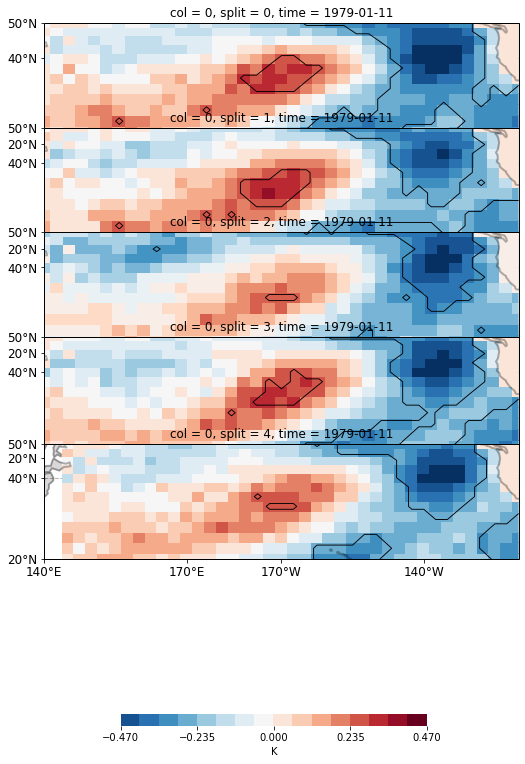

In [9]:
rg.plot_maps_corr()

In [10]:
rg.cluster_list_MI()

Plotting Corr maps sst_labels_init, split 4, lag 0

./RGCPD/plot_maps.py:254: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(pad=1.1-0.02*rows.size, h_pad=None, w_pad=None, rect=None)


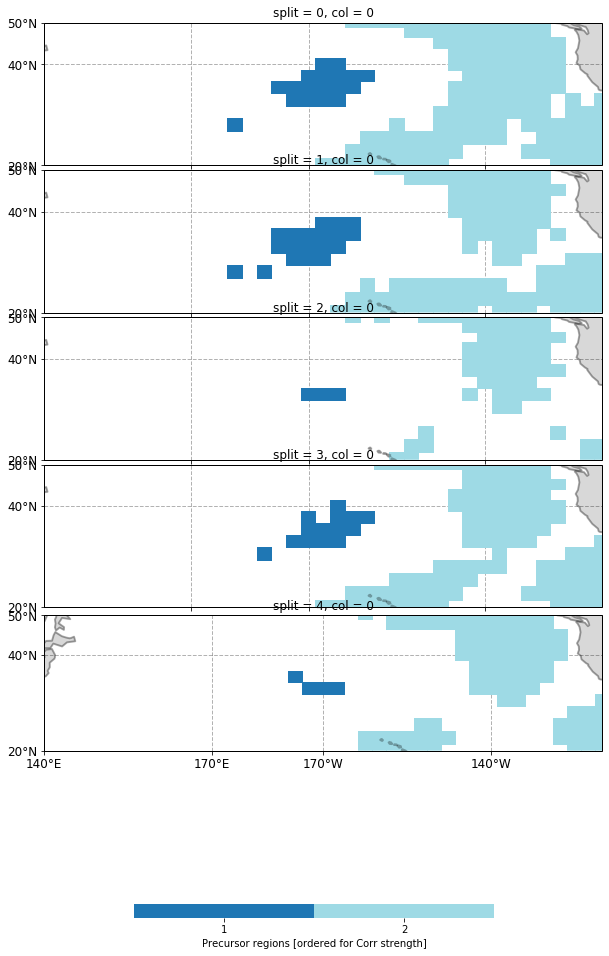

In [11]:
rg.quick_view_labels(median=False) 

In [12]:
rg.get_ts_prec()


Getting MI timeseries
There are [2, 2, 2, 2, 2] regions in total (list of different splits)


In [13]:
rg.df_data

3  0..1..sst  0..2..sst  TrainIsTrue  RV_mask
0 1979-01-11 -7.834037  -0.076862   0.158377         True    False
  1979-01-21 -1.560857   0.369718  -0.094729         True    False
  1979-01-31 -6.039140   0.362329  -0.093965         True    False
  1979-02-10 -8.095633   0.407966  -0.338281         True    False
  1979-02-20 -4.562972   1.135306  -0.340169         True    False
...                ...        ...        ...          ...      ...
4 2018-11-17 -6.276446  -0.824909   0.796156         True    False
  2018-11-27 -1.824193  -0.701254   0.870854         True    False
  2018-12-07 -3.683314  -0.809106   0.764821         True    False
  2018-12-17  3.248923  -0.406952   0.563966         True    False
  2018-12-27  1.954863  -0.264028   0.393546         True    False

[7200 rows x 5 columns]

In [14]:
rg.PCMCI_df_data()

Progress causal inference - traintest set 100%

In [15]:
rg.PCMCI_get_links(alpha_level=.05)


Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_labels, split 0, lag sst_labels_tigr

./RGCPD/plot_maps.py:254: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(pad=1.1-0.02*rows.size, h_pad=None, w_pad=None, rect=None)


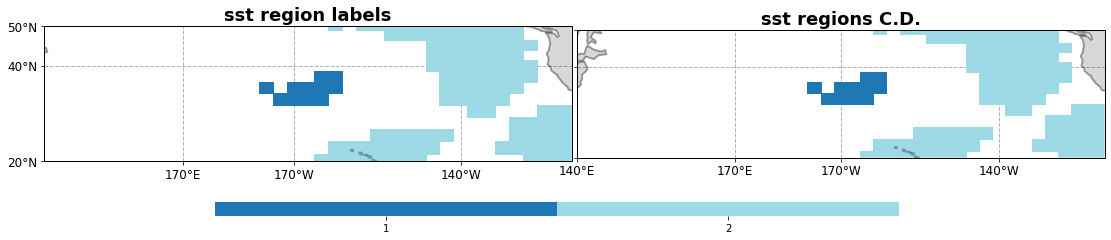

Plotting Corr maps sst_labels, split 0, lag sst_labels_tigr

./RGCPD/plot_maps.py:254: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(pad=1.1-0.02*rows.size, h_pad=None, w_pad=None, rect=None)


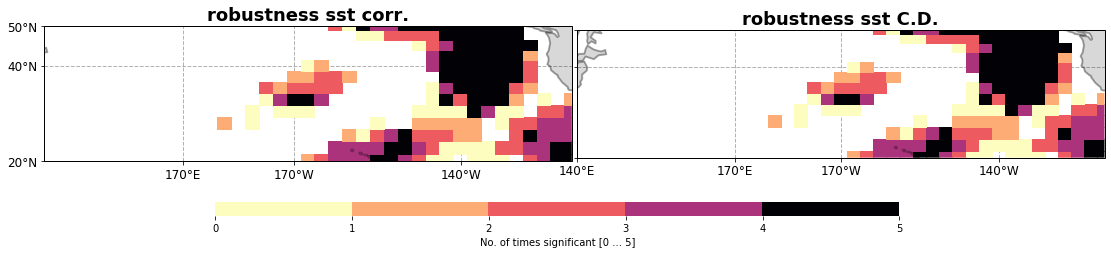


Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_corr_and_tigr, split 0, lag sst_corr_tigr

./RGCPD/plot_maps.py:254: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(pad=1.1-0.02*rows.size, h_pad=None, w_pad=None, rect=None)


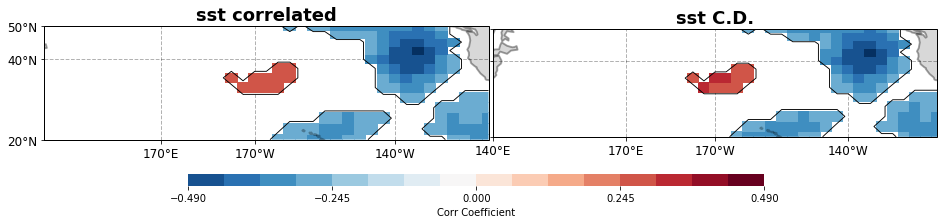

In [16]:
rg.plot_maps_sum()

In [17]:
rg.df_data

3  0..1..sst  0..2..sst  TrainIsTrue  RV_mask
0 1979-01-11 -7.834037  -0.076862   0.158377         True    False
  1979-01-21 -1.560857   0.369718  -0.094729         True    False
  1979-01-31 -6.039140   0.362329  -0.093965         True    False
  1979-02-10 -8.095633   0.407966  -0.338281         True    False
  1979-02-20 -4.562972   1.135306  -0.340169         True    False
...                ...        ...        ...          ...      ...
4 2018-11-17 -6.276446  -0.824909   0.796156         True    False
  2018-11-27 -1.824193  -0.701254   0.870854         True    False
  2018-12-07 -3.683314  -0.809106   0.764821         True    False
  2018-12-17  3.248923  -0.406952   0.563966         True    False
  2018-12-27  1.954863  -0.264028   0.393546         True    False

[7200 rows x 5 columns]

In [18]:
rg.df_links

0      1
0 3          False   True
  0..1..sst   True  False
  0..2..sst   True  False
1 3          False   True
  0..1..sst   True  False
  0..2..sst   True   True
2 3          False   True
  0..1..sst   True  False
  0..2..sst   True  False
3 3          False   True
  0..1..sst   True  False
  0..2..sst   True  False
4 3          False   True
  0..1..sst   True  False
  0..2..sst   True  False

In [19]:
rg.store_df_PCMCI()

Data stored in 
/Users/semvijverberg/surfdrive/Scripts/RGCPD/data/3_80d77_10jun-19aug_lag0-0_random5s1/None_tau_0-1_conds_dim3_combin2_dt10.h5


In [20]:
rg.PCMCI_get_ParCorr_from_txt()

# Condition selection results:

    pc_alpha=0.05 got score 6005.1793 with parents [ (3 -1) (0..1..sst -1) ]

    pc_alpha=0.1 got score 6005.1793 with parents [ (3 -1) (0..1..sst -1) ]

    pc_alpha=0.2 got score 6005.1793 with parents [ (3 -1) (0..1..sst -1) ]

    pc_alpha=0.3 got score 6005.1793 with parents [ (3 -1) (0..1..sst -1) ]

    pc_alpha=0.4 got score 6005.1793 with parents [ (3 -1) (0..1..sst -1) ]

    pc_alpha=0.5 got score 6005.1793 with parents [ (3 -1) (0..1..sst -1) ]



--> optimal pc_alpha for variable 3 is 0.05

# Condition selection results:

    pc_alpha=0.05 got score 6008.1862 with parents [ (3 -1) (0..1..sst -1) ]

    pc_alpha=0.1 got score 6008.1862 with parents [ (3 -1) (0..1..sst -1) ]

    pc_alpha=0.2 got score 6008.1862 with parents [ (3 -1) (0..1..sst -1) ]

    pc_alpha=0.3 got score 6008.1862 with parents [ (3 -1) (0..1..sst -1) ]

    pc_alpha=0.4 got score 6008.1862 with parents [ (3 -1) (0..1..sst -1) ]

    pc_alpha=0.5 got score 6008.1862 wit

In [21]:
rg.df_ParCorr_sum

,coeff mean,coeff min,coeff max,pval mean,pval max,ParCorr C.D.,ParCorr -,ParCorr (3 -1)
3 -1,0.2720,0.268,0.278,0.000000,0.0000,5,0,0
0..1..sst -1,0.1164,0.079,0.148,0.004332,0.0181,4,0,1
0..2..sst -1,-0.0642,-0.083,-0.029,0.113254,0.3823,0,2,3
